# Introduction 

**The goals from this notebook are learning how to use Kmeans, trying different hyperprameter and gain some knowledge about evaluation methods with simple way**

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,make_scorer
from sklearn.model_selection import GridSearchCV

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("../input"))

['customer-segmentation-tutorial-in-python']


# `02` Load Data

In [6]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.shape

(200, 5)

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Fortunately there are no nulls . 

**Check if there is dublicated in data or not**

In [11]:
data.duplicated().any()

False

I will check it again after droping customers IDs.

**Checking the values in the data whether they are valid or not , i will look at each column**

In [12]:
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [13]:
data["Age"].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

In [14]:
data["Annual Income (k$)"].value_counts()


Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [15]:
data["Spending Score (1-100)"].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

**Fortunately there are no non valid inuts in the data** 

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

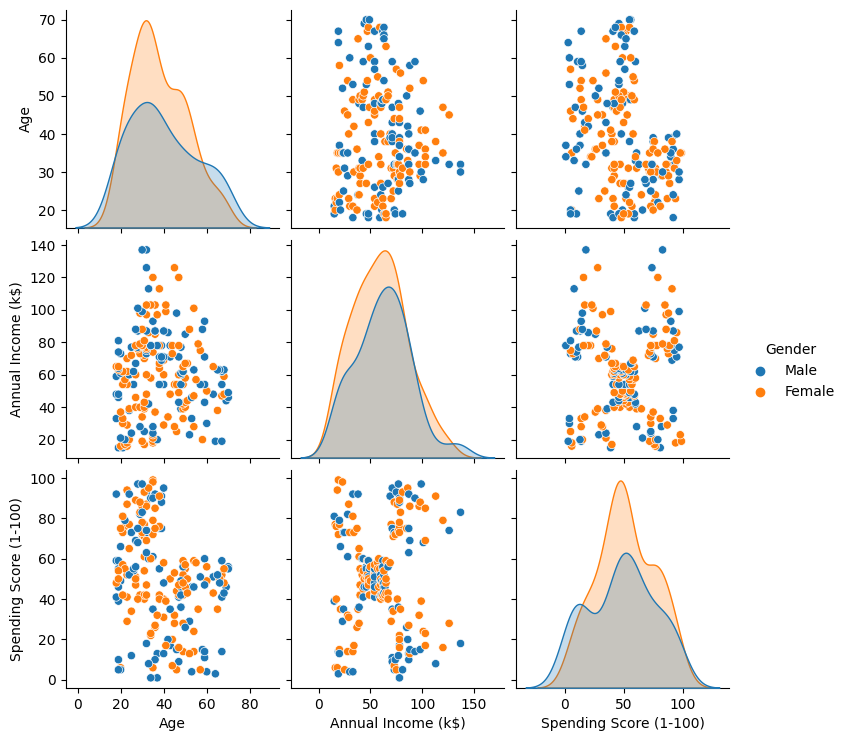

In [16]:
sns.pairplot(data.drop('CustomerID', axis=1),hue='Gender')

**we note** 
* ther are some skewness in tha data
* gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

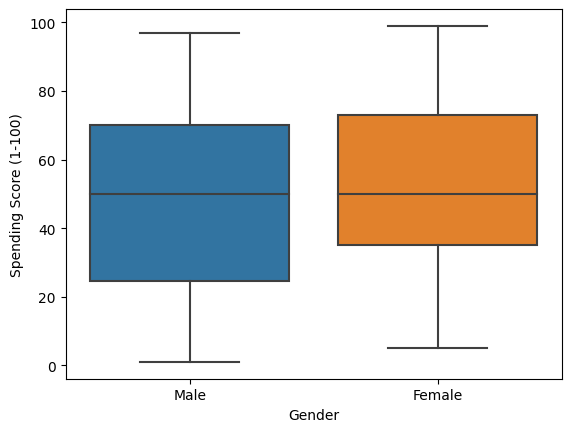

In [17]:
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)')


# `04` Data Preparation
Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

**Drop columns that we don't need**

In [18]:
data.drop(['CustomerID', 'Gender'], axis=1 ,inplace=True)

**scaling**

In [19]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

# `05` K-means 

## steps
* We first generate some sample data using make_blobs.
* Then, we create a KMeans model with n_clusters=4 and fit it to the data.
* After fitting the model, we use the predict method to assign each data point to a cluster and retrieve the centroids using the cluster_centers_ attribute.
* Finally, we visualize the clusters by plotting the data points with different colors based on their cluster assignments (c=y_kmeans) and plot the centroids as red points.

In [20]:
data, _ = make_blobs(n_samples=300,  random_state=42)

In [21]:
# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(data)

KMeans(n_clusters=5, random_state=42)

In [22]:
# Predict clusters and find centroids
y_kmeans = kmeans_model.predict(data)
centroids = kmeans_model.cluster_centers_

Text(0.5, 1.0, 'K-Means Clustering')

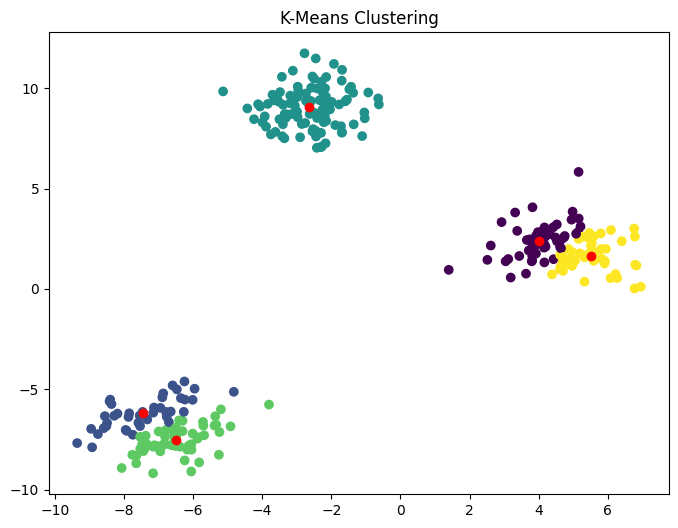

In [23]:
# Visualize clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points with different colors based on their cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans )

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red')

plt.title('K-Means Clustering')

# `06` Evaluation

## Elbow Method

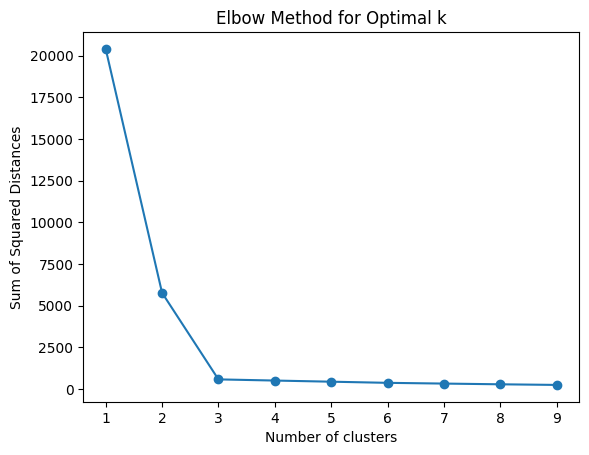

In [24]:
sse=[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

#### The Elbow method is the most popular way to find the number of clusters for k-means. **But there are much better alternatives**

The Elbow method is based on inertia, which is a score of the goodness of fit of clusters. But if we want to use a different method, we will need to use a different score.

* **Inertia (Within-Cluster Sum of Squares):**
        Inertia measures the sum of squared distances of samples to their closest cluster center. Lower inertia indicates tighter clusters.
        Evaluate the inertia for different values of K (number of clusters) and plot it. The "elbow point" in the plot can suggest the optimal number of clusters. However, be cautious as the elbow method is not always definitive.

* **Silhouette Score:**
        Silhouette score measures how similar an object is to its own cluster compared to other clusters.
        Compute the silhouette score for different values of K and choose the K with the highest silhouette score. Higher scores indicate better-defined clusters.

* **Calinski-Harabasz Index:**
        Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion.
        Compute the index for different values of K and choose the K with the highest index. Higher values indicate         better clustering.

* **Davies-Bouldin Index:**
        Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.
        Compute the index for different values of K and choose the K with the lowest index. Lower values indicate           better clustering.

* **Gap Statistics:**
        Gap statistics compare the inertia of the clusters to that of a reference null distribution.
        Compute gap statistics for different values of K and choose the K that maximizes the gap between the                 clustered data and the null reference distribution.

* **Cross-Validation:**
       Although not as common in unsupervised learning, cross-validation techniques such as k-fold cross-validation can be adapted to evaluate the stability and generalizability of the clustering results.

* **Visual Inspection:**
        Visualize the clustered data in 2D or 3D space (e.g., using scatter plots) and inspect the separation and           cohesion of clusters. This can provide insights into the appropriateness of the chosen number of clusters.

In [25]:
inertia = kmeans_model.inertia_
print("Inertia:", inertia)

Inertia: 429.78210104306487


In [26]:
# Silhouette Score
silhouette_avg = silhouette_score(data, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.501403768738471


In [27]:
# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data, y_kmeans)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 3427.263418227586


In [28]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(data, y_kmeans)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.9801546309366559


## using grid search to choose the best K achiving the **highest Silhouette Score**

In [29]:
# Define a range of K values to try
param_grid = {'n_clusters': [ 4, 5, 6]}

In [30]:
# Create KMeans model
kmeans_model = KMeans(random_state=42)

In [31]:
# Perform grid search using silhouette score as the scoring metric
grid_search = GridSearchCV(kmeans_model, param_grid, cv=5, scoring=make_scorer(silhouette_score))
grid_search.fit(data)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [4, 5, 6]},
             scoring=make_scorer(silhouette_score))

In [32]:
# Get the best K value
best_k = grid_search.best_params_['n_clusters']
best_k

4

In [33]:
# Train the KMeans model with the best K value
best_kmeans_model = KMeans(n_clusters=best_k, random_state=42)
best_kmeans_model.fit(data)

KMeans(n_clusters=4, random_state=42)

In [34]:
# Predict clusters
y_kmeans = best_kmeans_model.predict(data)

In [35]:
# Evaluate clustering performance using the best K value
silhouette_avg = silhouette_score(data, y_kmeans)
print("Best K:", best_k)
print("Silhouette Score:", silhouette_avg)

Best K: 4
Silhouette Score: 0.6629719803670588


# Try different hyperparameter

In [36]:
kmeans_model = KMeans(n_clusters=4, random_state=42,init='random',algorithm='elkan')

In [37]:
kmeans_model.fit(data)

KMeans(algorithm='elkan', init='random', n_clusters=4, random_state=42)

In [38]:
# Predict clusters
y_kmeans = kmeans_model.predict(data)

In [39]:
silhouette_avg = silhouette_score(data, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6764211610337508
